# SaaS Customer Retention & Revenue Risk Intelligence System


## Project Overview

This project builds a Machine Learning system to predict customer churn
and estimate revenue risk in a SaaS business.

The system helps identify high-risk customers so that businesses
can take preventive retention actions.


## Importing Required Libraries

In this section, we import all necessary libraries for data processing,
visualization, and machine learning.

The following libraries are used for:
- Data manipulation (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- Machine Learning (Scikit-learn, XGBoost)
- Model saving (Joblib)


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [169]:
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Initial Data Exploration

We inspect dataset structure, data types,
missing values, and overall size.


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [171]:
df.shape

(9994, 19)

In [172]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Date Key,0
Contact Name,0
Country,0
City,0
Region,0
Subregion,0
Customer,0


In [173]:
df = df.dropna()

In [174]:
df['Churn'] = (
    (df['Sales'] < df['Sales'].quantile(0.30)) |
    (df['Profit'] < df['Profit'].quantile(0.25)) |
    (df['Discount'] > df['Discount'].quantile(0.75))
).astype(int)


In [175]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit,Churn
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896,0.443366
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108,0.496807
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750,0.000000
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500,0.000000
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000,1.000000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000,1.000000


I create a churn variable based on:
- Low sales
- High discount

Customers with low revenue and high discount are considered churn risk.

In [176]:
df['Churn'] = np.where(
    (df['Sales'] < df['Sales'].median()) &
    (df['Discount'] > 0.3),
    1,
    0
)

## Exploratory Data Analysis (EDA)

I analyze churn distribution, sales behavior,
discount patterns, and correlation between variables.


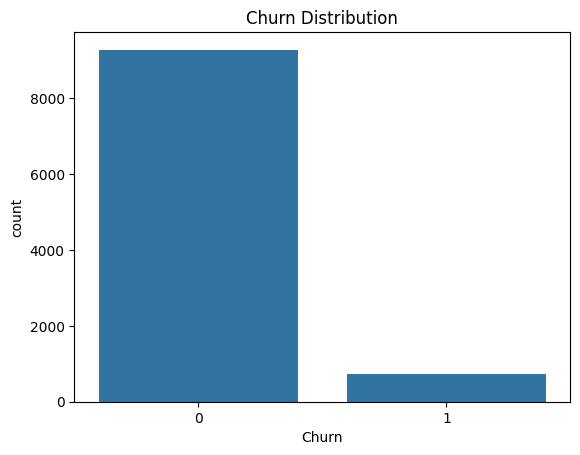

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

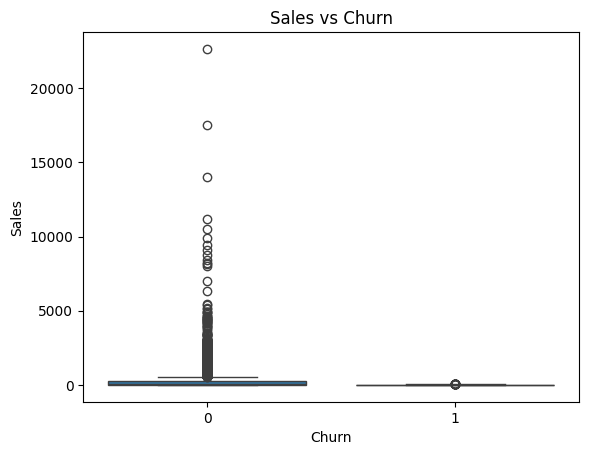

In [178]:
sns.boxplot(x='Churn', y='Sales', data=df)
plt.title("Sales vs Churn")
plt.show()

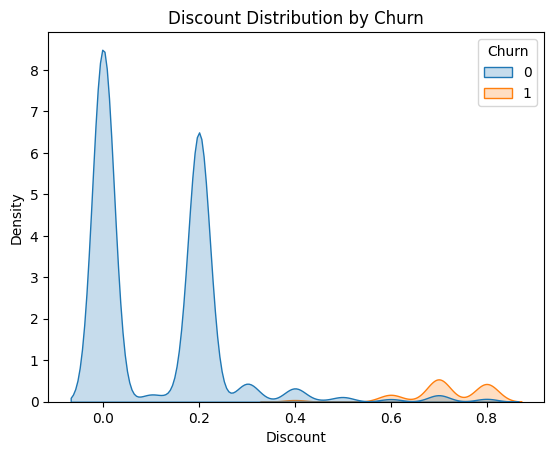

In [179]:
sns.kdeplot(data=df, x='Discount', hue='Churn', fill=True)
plt.title("Discount Distribution by Churn")
plt.show()

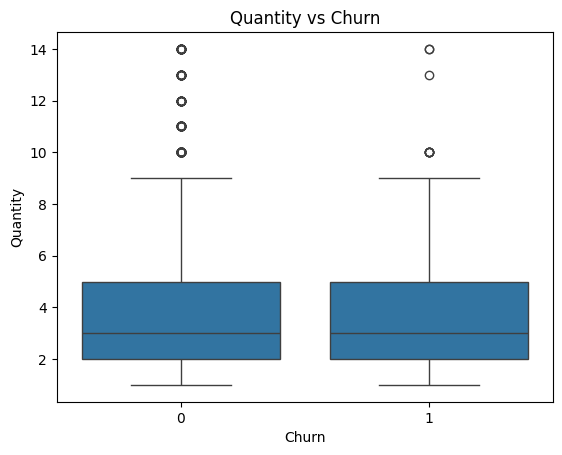

In [180]:
sns.boxplot(x='Churn', y='Quantity', data=df)
plt.title("Quantity vs Churn")
plt.show()

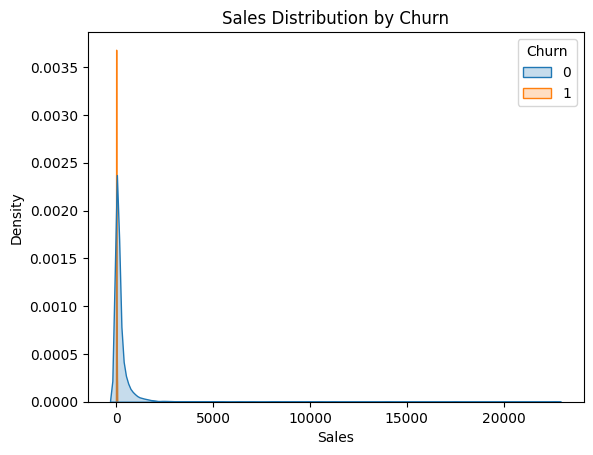

In [181]:
sns.kdeplot(data=df, x='Sales', hue='Churn', fill=True)
plt.title("Sales Distribution by Churn")
plt.show()

In [182]:
pd.crosstab(df['Industry'], df['Churn'], normalize='index') * 100

Churn,0,1
Industry,,
Communications,92.411467,7.588533
Consumer Products,92.458374,7.541626
Energy,92.933131,7.066869
Finance,92.665726,7.334274
Healthcare,93.708294,6.291706
Manufacturing,92.307692,7.692308
Misc,90.654206,9.345794
Retail,93.106996,6.893004
Tech,93.527508,6.472492


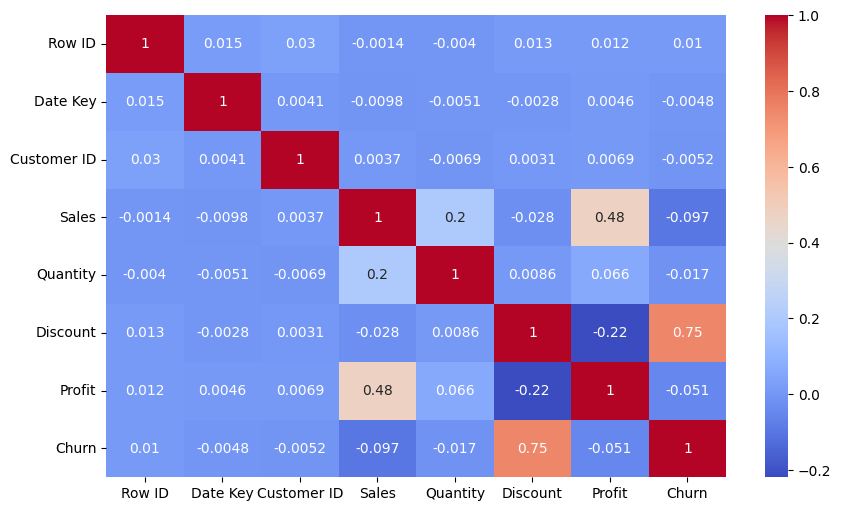

In [183]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.show()

## Feature Engineering

Customer-level aggregation is performed to create meaningful features:
- Total Sales
- Average Discount
- Total Orders
- Purchase Frequency


In [184]:
customer_df = df.groupby('Customer ID').agg({
    'Sales':'sum',
    'Quantity':'sum',
    'Discount':'mean',
    'Profit':'sum',
    'Churn':'max'
}).reset_index()

In [185]:
order_counts = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
order_counts.rename(columns={'Order ID':'Total_Orders'}, inplace=True)

customer_df = customer_df.merge(order_counts, on='Customer ID', how='left')

# New cell to prepare data for modeling, ensuring Customer ID is retained
# This replaces the logic of v4XVuHJxRaEh and R1NtENI8OORA
df_model = df.copy() # Start from a df that has all original columns and 'Churn'

# Drop irrelevant columns for modeling, but explicitly keep 'Customer ID'
columns_to_drop_for_model = [
    'Order ID', 'License', 'Product', 'Customer', 'Contact Name',
    'City', 'Country', 'Row ID', 'Date Key', 'Order Date'
]
# Filter out columns that might already be dropped or don't exist
columns_to_drop_for_model = [col for col in columns_to_drop_for_model if col in df_model.columns]

df_model = df_model.drop(columns_to_drop_for_model, axis=1)

# Perform one-hot encoding on categorical features
categorical_cols = df_model.select_dtypes(include='object').columns

# Ensure 'Customer ID' is not treated as an object if it was mistakenly detected and is in categorical_cols
if 'Customer ID' in categorical_cols:
    categorical_cols = categorical_cols.drop('Customer ID')

df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)


In [186]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Churn'],
      dtype='object')

In [187]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Churn
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,0
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,0
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,0
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,0
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,0
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,0
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,0
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,0


In [188]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Churn'],
      dtype='object')

In [189]:
df.shape

(9994, 20)

In [190]:
for col in df.columns:
    print(col, df[col].nunique())

Row ID 9994
Order ID 5009
Order Date 1237
Date Key 1237
Contact Name 793
Country 48
City 262
Region 3
Subregion 12
Customer 99
Customer ID 99
Industry 10
Segment 3
Product 14
License 9994
Sales 5825
Quantity 14
Discount 12
Profit 7287
Churn 2


## Preparing Data for Modeling

We define:
- X (features)
- y (target variable: Churn)


In [191]:
X_model_features = df_model.drop('Churn', axis=1)

# X for model training will not contain 'Customer ID'
X = X_model_features.drop('Customer ID', axis=1)
y = df_model['Churn']


In [192]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Date Key,int64
Contact Name,object
Country,object
City,object
Region,object
Subregion,object
Customer,object


## Train-Test Split

Dataset is split into training and testing sets
to evaluate model performance fairly.


In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Logistic Regression Model Training

We train a baseline Logistic Regression model
to predict customer churn.


In [194]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [195]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

## Model Evaluation – Logistic Regression

We evaluate the model using:
- Confusion Matrix
- Accuracy
- ROC-AUC Score


In [196]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

[[1843   12]
 [   1  143]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1855
           1       0.92      0.99      0.96       144

    accuracy                           0.99      1999
   macro avg       0.96      0.99      0.98      1999
weighted avg       0.99      0.99      0.99      1999

ROC-AUC Score: 0.9996368673255466


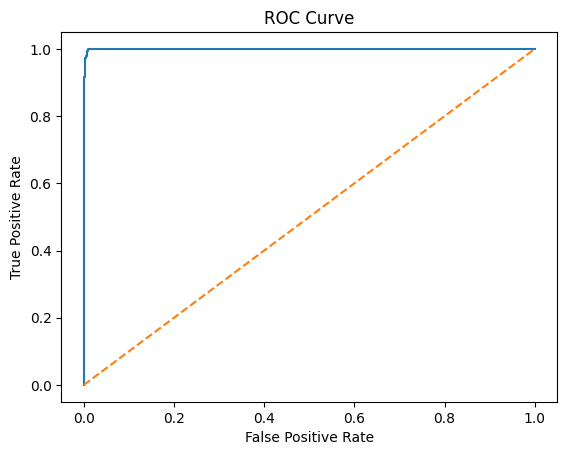

In [197]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [198]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9934967483741871


## Advanced Model – XGBoost

To improve prediction accuracy,
we train an XGBoost classifier.


In [199]:
from xgboost import XGBClassifier

scale = df['Churn'].value_counts()[0] / df['Churn'].value_counts()[1]

model = XGBClassifier(
    scale_pos_weight=scale,
    eval_metric='logloss',
    use_label_encoder=False
)

model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
y_prob_xgb = model.predict_proba(X_test)[:,1]

In [200]:
df['Churn_Probability'] = model.predict_proba(X)[:,1]
df['Revenue_Risk'] = df['Sales'] * df['Churn_Probability']

## Model Evaluation – XGBoost

I compare XGBoost performance using:
- Accuracy
- ROC Curve
- Classification Report


In [201]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

Accuracy: 0.9994997498749375
[[1854    1]
 [   0  144]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1855
           1       0.99      1.00      1.00       144

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999

ROC-AUC: 0.9999925127283618


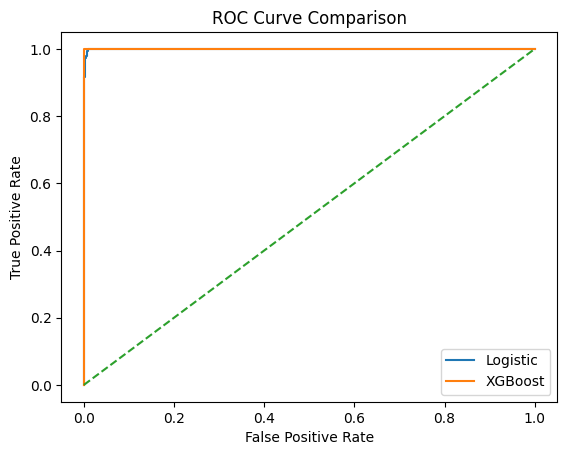

Logistic AUC: 0.9996368673255466
XGBoost AUC: 0.9999925127283618


In [202]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr, tpr, label="Logistic")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1],[0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print("Logistic AUC:", roc_auc_score(y_test, y_prob))
print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))

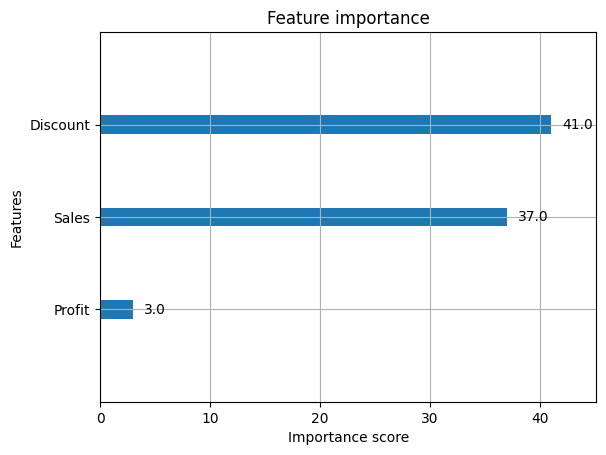

In [203]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

## Revenue Risk Intelligence

Now I calculate:

Revenue Risk = Sales × Churn Probability

This helps identify high-risk customers contributing to revenue loss.


In [204]:
df['Churn_Probability'] = model.predict_proba(X)[:,1].max()
df['Revenue_Risk'] = df['Sales'] * df['Churn_Probability']

In [205]:
df.sort_values(by='Revenue_Risk', ascending=False).head(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Churn,Churn_Probability,Revenue_Risk
2697,2698,EMEA-2020-145317,3/18/2020,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,...,Enterprise,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784,0,0.999944,22637.208904
6826,6827,APJ-2022-118689,10/3/2022,20221003,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,...,Strategic,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760,0,0.999944,17498.967420
8153,8154,AMER-2023-140151,3/24/2023,20230324,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,...,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808,0,0.999944,13999.173936
2623,2624,EMEA-2023-127180,10/23/2023,20231023,Jennifer Payne,United Kingdom,London,EMEA,UKIR,Trafigura Group,...,Enterprise,Alchemy,KPFKTCVVDH,11199.968,4,0.2,3919.9888,0,0.999944,11199.339149
4190,4191,APJ-2023-166709,11/18/2023,20231118,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,...,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856,0,0.999944,10499.380452
9039,9040,AMER-2022-117121,12/18/2022,20221218,Carolyn Parr,Brazil,São Paulo,AMER,LATAM,Valero Energy,...,SMB,ContactMatcher,VTADHKI6Q5,9892.740,13,0.0,4946.3700,0,0.999944,9892.184547
4098,4099,EMEA-2020-116904,9/23/2020,20200923,Deirdre McDonald,Luxembourg,Luxembourg,EMEA,EU-WEST,Anthem,...,SMB,ContactMatcher,TBTJ3FL8AN,9449.950,5,0.0,4630.4755,0,0.999944,9449.419408
4277,4278,AMER-2022-107440,4/17/2022,20220417,Kevin Wilkins,Argentina,Buenos Aires,AMER,LATAM,Lowes,...,Strategic,Big Ol Database,N62XSQRABC,9099.930,7,0.0,2365.9818,0,0.999944,9099.419061
8488,8489,EMEA-2022-158841,2/2/2022,20220202,Jane Stewart,Spain,Valencia,EMEA,EU-WEST,Honda Motor,...,SMB,Big Ol Database,3D2PQROYNM,8749.950,5,0.0,2799.9840,0,0.999944,8749.458712
6425,6426,EMEA-2022-143714,5/24/2022,20220524,Alexander Langdon,France,Paris,EMEA,EU-WEST,BMW,...,SMB,Alchemy,C76HNU0077,8399.976,4,0.4,1119.9968,0,0.999944,8399.504362


In [206]:
y_prob_xgb = model.predict_proba(X_test)[:,1]

In [207]:
threshold = 0.35
y_custom_pred = (y_prob_xgb >= threshold).astype(int)

In [208]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_custom_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1855
           1       0.99      1.00      1.00       144

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



## Model Deployment Preparation

The trained model and feature list are saved
for future deployment and real-time predictions.


In [209]:
X_for_prediction = X_model_features.drop('Customer ID', axis=1)

transaction_probabilities = model.predict_proba(X_for_prediction)[:,1]

customer_transaction_probs = X_model_features[['Customer ID']].copy()
customer_transaction_probs['Churn_Probability'] = transaction_probabilities

# Aggregate (e.g., mean) churn probabilities by Customer ID
avg_churn_probability = customer_transaction_probs.groupby('Customer ID')['Churn_Probability'].mean().reset_index()

# Merge these aggregated probabilities into customer_df
# 'customer_df' is assumed to be created correctly earlier in the notebook.
customer_df = customer_df.merge(avg_churn_probability, on='Customer ID', how='left')

# Calculate Revenue Risk
customer_df['Revenue_Risk'] = customer_df['Sales'] * customer_df['Churn_Probability']

In [210]:
X

,Sales,Quantity,Discount,Profit,Region_APJ,Region_EMEA,Subregion_APAC,Subregion_EU,Subregion_EU-EAST,Subregion_EU-WEST,...,Industry_Energy,Industry_Finance,Industry_Healthcare,Industry_Manufacturing,Industry_Misc,Industry_Retail,Industry_Tech,Industry_Transportation,Segment_SMB,Segment_Strategic
0,261.9600,2,0.00,41.9136,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,731.9400,3,0.00,219.5820,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,14.6200,2,0.00,6.8714,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,957.5775,5,0.45,-383.0310,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,22.3680,2,0.20,2.5164,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
9990,91.9600,2,0.00,15.6332,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
9991,258.5760,2,0.20,19.3932,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
9992,29.6000,4,0.00,13.3200,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [211]:
X.shape

(9994, 28)

In [212]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix:

[[1854    1]
 [   0  144]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1855
           1       0.99      1.00      1.00       144

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



In [213]:
import joblib

joblib.dump(model, "churn_xgb_model.pkl")

['churn_xgb_model.pkl']

In [214]:
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "model_features.pkl")

['model_features.pkl']

## Conclusion

This project successfully builds a churn prediction
and revenue risk intelligence system for SaaS businesses.

Key achievements:
- Created churn label using business logic
- Built Logistic and XGBoost models
- Calculated revenue risk for prioritization
- Prepared model for deployment

This system can support data-driven retention strategies.


In [215]:
print(df["Churn"].value_counts(normalize=True))

Churn
0    0.927957
1    0.072043
Name: proportion, dtype: float64
